<a href="https://colab.research.google.com/github/redman157/HocML/blob/master/object_cactus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pson2900","key":"977eb592f0fe57a4c97e7d050cf9c637"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json
# Next, install the Kaggle API client.
!pip install -q kaggle
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
# List available datasets.
!kaggle datasets list

-rw-r--r-- 1 root root 64 Apr 22 03:05 kaggle.json
ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          32312  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25          22844  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          23569  
bigquery/crypto-ethereum-classic                             Ethereum Classic Blockchain                          70GB  2019-03-20 23:21:25              0  
mohansa

In [3]:
!kaggle competitions download -c aerial-cactus-identification

  0% 0.00/667k [00:00<?, ?B/s]
100% 667k/667k [00:00<00:00, 91.7MB/s]
  0% 0.00/160k [00:00<?, ?B/s]
100% 160k/160k [00:00<00:00, 44.9MB/s]
  0% 0.00/4.20M [00:00<?, ?B/s]
100% 4.20M/4.20M [00:00<00:00, 38.4MB/s]
 47% 9.00M/19.2M [00:00<00:00, 30.6MB/s]
100% 19.2M/19.2M [00:00<00:00, 48.6MB/s]


In [0]:
!unzip train.zip
!unzip test.zip

In [0]:
import pandas as pd
import numpy as np
import os, sys
import pickle
import cv2 
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from PIL import Image
from keras.preprocessing import image

df_train = pd.read_csv('train.csv')
img_train = os.path.join('train')
img_test  = os.path.join('test')

# LOAD AND READ IMAGE

In [0]:
img_df_train = [item for item in img_train]
img_df_test = [item for item in img_test]

In [0]:
def load_file(fileNames):
  return [os.path.join(fileNames,fileName) for fileName in os.listdir(fileNames)]
def resize(img):
  return cv2.resize(img , (224,224) , interpolation = cv2.INTER_AREA)

In [0]:
train_path = load_file(img_train)
test_path = load_file(img_test)

In [153]:
im= Image.open(train_path[0])
plt.imshow(im)

AttributeError: ignored

# PREPROCESSING IMAGE

In [0]:
X_train = [resize(plt.imread(train_path)) for train_path in train_path]
X_test = [resize(plt.imread(test_path)) for test_path in test_path]
X_train = np.array(X_train)
X_test = np.array(X_test)

In [0]:
def save_data(file, fileName):
  with open(fileName, 'wb') as f:
    pickle.dump(file,f)
  f.close()
def open_data(file):
  with open(file,'rb') as f:
    file = pickle.load(f)
  return file

In [0]:
save_data(X_train,"trainDf")
save_data(X_test,"testDf")

In [0]:
file_train = open_data("trainDf")
file_test = open_data("testDf")

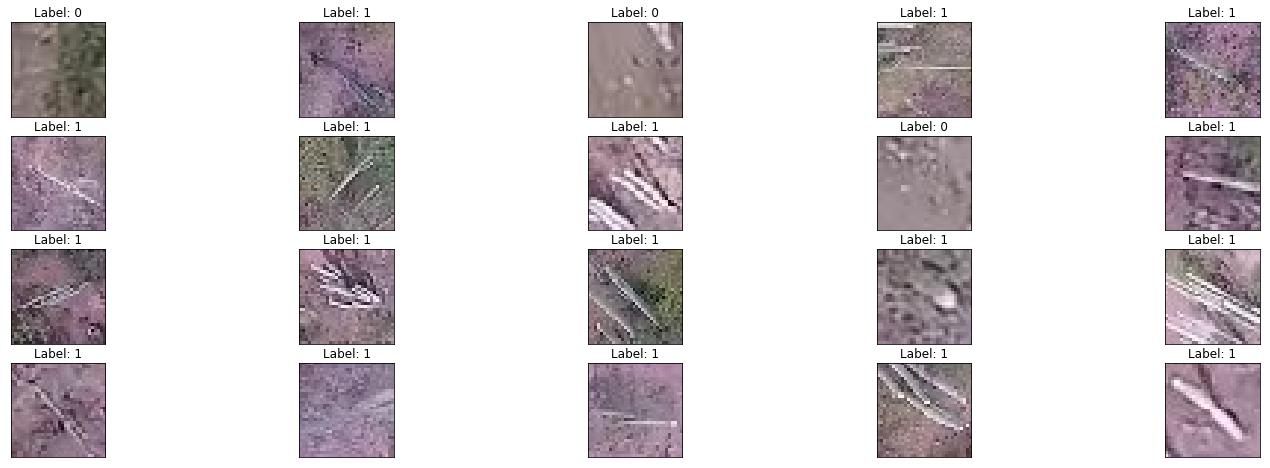

In [178]:
labels = pd.read_csv('train.csv')
fig = plt.figure(figsize= (25,8))
train_imgs = os.listdir('train/')
for index, img in enumerate(np.random.choice(train_imgs, 20)):
  ax = fig.add_subplot(4, 5, index+1, xticks =[], yticks =[])
  im = Image.open('train'+'/'+img)
  plt.imshow(im)
  lab = labels.loc[labels['id']== img,'has_cactus'].values[0]
  ax.set_title(f'Label: {lab}')

  

['test/d2dc21cd44a2c5eb4b370eaf51569740.jpg',
 'test/810ab4694e7cad86ca0596066ea09adb.jpg',
 'test/cba93f787a305942df6b642a2ba55eeb.jpg',
 'test/c69c62ff3f623ef3cd371585c896f901.jpg',
 'test/c6cc90a19210246b54736940f07bcee8.jpg',
 'test/499c4223559f06d30ba803de2e595512.jpg',
 'test/853b7b682c47ad0d8752b6f1fa0a699c.jpg',
 'test/c8e3361b6aa4e580942e4abbacb03b10.jpg',
 'test/f0281d7d405f530ff247a01e3ce5778e.jpg',
 'test/ad4f3ecda782b24233b02ae092e9af69.jpg',
 'test/0f7621deb8411129970249ecd38a37c3.jpg',
 'test/91cc78cef3fdb27ac350f6c87ea3c07e.jpg',
 'test/cf142b4482c49f3a113142098570a0f5.jpg',
 'test/89c23c9f38532dd325be38aa97b9b655.jpg',
 'test/546cb4e0e46927319d60c5b6d64521a2.jpg',
 'test/3f864bf28131591eb295ce04afb63d6d.jpg',
 'test/a399ef3ce9dd94c6ebf2b61ddc17730b.jpg',
 'test/bf1d1277ff42df8bdf410f236f037cdd.jpg',
 'test/319d83e0975607bf5cadaa0950492dcc.jpg',
 'test/735251d8e2d6e7b7f9a95310ed061099.jpg',
 'test/22a27838e38eae93ffdb9a5f3d74f290.jpg',
 'test/d16bc42c01134fe85061f36427c

In [0]:
a = (labels.loc[:20, 'has_cactus']).values

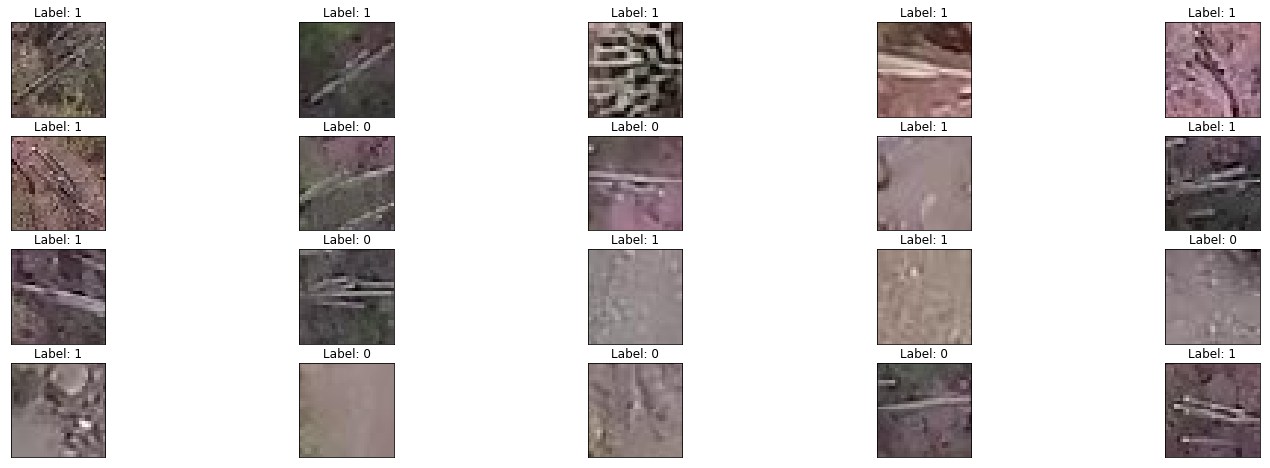

In [143]:
labels = pd.read_csv('train.csv')
fig = plt.figure(figsize= (25,8))
for index, img in enumerate(X_test):
  if (index == 20):
    break
  ax = fig.add_subplot(4, 5, index+1, xticks =[], yticks =[])
  plt.imshow(img)
  lab = labels.loc[:20,'has_cactus'].values
  ax.set_title(f'Label: {lab[index]}')

  

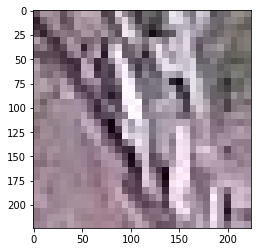